In [2]:
import pandas as pd
import os
import functions
import seaborn as sns


In [3]:

Path = "./New Folder With Items/"
filelist = os.listdir(Path)
txt_files = []
file_names = []
num =[]
for i in filelist:
    if i.endswith(".txt"):
        file_names.append(i)
        with open(Path + i, 'r', encoding='utf8') as f:
            data = f.read()
            txt_files.append(data)
            words = data.split()
            num.append(len(words))
print(num)
           

[1672, 3511, 3999, 3845, 3921]


In [4]:
preprocessed_files = [ functions.preprocess_text(i) for i in txt_files ]

In [5]:
distrubutions = [functions.generate_distrubution(i) for i in preprocessed_files]

In [6]:
Df = pd.DataFrame(distrubutions,
                  columns=['Condition', 'Generalization',
                        'Modality', 'Numeric quantifier', 'Num Vague Terms'],
                 index = file_names)
Df[Df['Num Vague Terms']!=0].to_csv('./Distrubution.csv')
Df[Df['Num Vague Terms']==0].to_csv('./No_Terms.csv')

In [7]:
Df[ Df['Num Vague Terms']!=0 ]
Df["Name"] = Df.index
Df["Name"] = Df["Name"].map(lambda x: str(x)[:-4])
Df["Name"]= Df["Name"].str.replace("-"," ")
Df["Name"]= Df["Name"].str.replace(","," ")
Df = Df.set_index("Name")

In [8]:
print("OVERALL AVERAGE")
for i in Df:
    print(i, ": ", Df[Df['Num Vague Terms'] != 0][i].mean())

OVERALL AVERAGE
Condition :  6.620544574104946
Generalization :  2.326426927046122
Modality :  67.69992855441771
Numeric quantifier :  23.353099944431214
Num Vague Terms :  64.8


In [9]:
Df.index

Index(['AirtelThanks Recharge BillPay Bank LiveTV',
       'AJIOOnlineShopping HandpickedCuratedFashion', 'AmazonPrimeVideo',
       'AmazonShopping UPI MoneyTransfer BillPayment',
       'Biugo videomaker photovideomaker videoeditor'],
      dtype='object', name='Name')

In [10]:
Df["Name"] = Df.index
Df["Name"] = Df["Name"].map(lambda x: str(x)[:-4])
Df["Name"]= Df["Name"].str.replace("-"," ")
Df["Name"]= Df["Name"].str.replace(","," ")



In [11]:
Df

,Condition,Generalization,Modality,Numeric quantifier,Num Vague Terms,Name
Name,,,,,,
AirtelThanks Recharge BillPay Bank LiveTV,5.128205,0.000000,82.051282,12.820513,39,AirtelThanks Recharge BillPay Bank Li
AJIOOnlineShopping HandpickedCuratedFashion,5.263158,3.508772,75.438596,15.789474,57,AJIOOnlineShopping HandpickedCuratedFas
AmazonPrimeVideo,4.411765,2.941176,58.823529,33.823529,68,AmazonPrimeV
AmazonShopping UPI MoneyTransfer BillPayment,4.615385,3.076923,56.923077,35.384615,65,AmazonShopping UPI MoneyTransfer BillPay
Biugo videomaker photovideomaker videoeditor,13.684211,2.105263,65.263158,18.947368,95,Biugo videomaker photovideomaker videoed


In [12]:
Df['Num'] = num

In [61]:
Df

,Condition,Generalization,Modality,Numeric quantifier,Num Vague Terms,Num,Name
Name,,,,,,,
AirtelThanks Recharge BillPay Bank Li,5.128205,0.000000,82.051282,12.820513,39,1672,AirtelThanks Recharge BillPay Ban
AJIOOnlineShopping HandpickedCuratedFas,5.263158,3.508772,75.438596,15.789474,57,3511,AJIOOnlineShopping HandpickedCurate
AmazonPrimeV,4.411765,2.941176,58.823529,33.823529,68,3999,AmazonPr
AmazonShopping UPI MoneyTransfer BillPay,4.615385,3.076923,56.923077,35.384615,65,3845,AmazonShopping UPI MoneyTransfer Bil
Biugo videomaker photovideomaker videoed,13.684211,2.105263,65.263158,18.947368,95,3921,Biugo videomaker photovideomaker vid


In [75]:
%ls

 Volume in drive C is OS
 Volume Serial Number is 7073-A0D4

 Directory of C:\Users\clift\Documents\GitHub\Privacy-Policies-Ambiguity

02-05-2021  01.03 AM    <DIR>          .
02-05-2021  01.03 AM    <DIR>          ..
15-04-2021  04.57 PM    <DIR>          .ipynb_checkpoints
25-04-2021  04.44 PM    <DIR>          __pycache__
24-03-2021  08.30 PM             1,392 app.py
02-05-2021  12.37 AM               659 Distrubution.csv
24-03-2021  08.30 PM             3,922 functions.py
24-03-2021  08.30 PM    <DIR>          New Folder With Items
02-05-2021  12.37 AM                71 No_Terms.csv
02-05-2021  12.58 AM             3,156 PolicyCats.csv
24-03-2021  08.30 PM            29,067 queries.json
02-05-2021  01.03 AM            24,204 Script.ipynb
24-03-2021  08.30 PM           346,664 skillport.png
01-05-2021  08.17 PM             8,007 Streamlit.py
               9 File(s)        417,142 bytes
               5 Dir(s)   6,309,654,528 bytes free


In [38]:
cat= pd.read_csv("PolicyCats.csv" )

In [39]:
plot = cat['Category'].value_counts()

In [72]:
plot = pd.DataFrame(plot)

<AxesSubplot:>

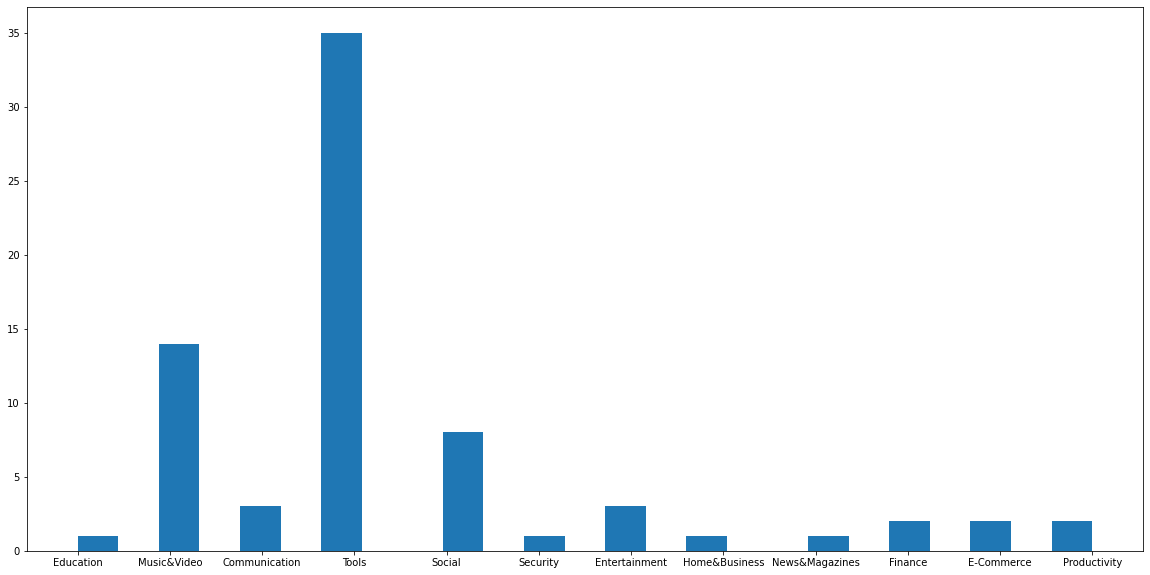

In [83]:
from matplotlib import pyplot as plt
plt.figure(figsize=(20,10))
cat.iloc[:, 1].hist(grid = False, bins = 25)


<AxesSubplot:>

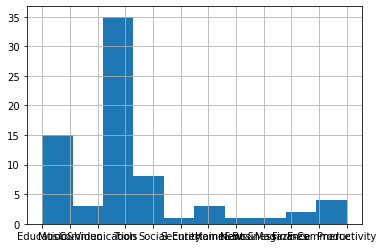